In [1]:
#my Kmeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import seaborn as sb
from random import randint
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
#importing data
NBA=pd.read_csv("D:/UTA/Fall_2018/Data_Mining/NBAstats.csv")
#NBA.info() #upon execution we found that there is no NAN values in the data frame
#spliting the data into two and droppin the feature 'Tm'
First=NBA.iloc[:,0:2]
rem=NBA.iloc[:,2:]
rem=rem.drop(['Tm'],1)

In [2]:
#Standarization for the dataframe Rem
dic={}
for column in rem:
    dic[column]=rem[column].mean()
new=pd.DataFrame()
for col in rem:
    mean= rem[col].mean()
    new[col]=(rem[col]-mean)**2
dic_sd={}
for column in new:
    dic_sd[column]=m.sqrt(new[column].mean())
for col in rem:
    rem[col]=(rem[col]-dic[col])/dic_sd[col]


In [3]:
#the player is an index. and we need not take the column for clustering 
NBA[NBA.duplicated(['Player'], keep=False)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G


In [4]:
result=pd.concat([First,rem],axis=1)
result=result.drop('Player',1)

In [5]:
labelencoder = LabelEncoder()
result.iloc[:,0:1] = labelencoder.fit_transform(result.iloc[:,0:1])
#result.iloc[:,1:2]=labelencoder.fit_transform(result.iloc[:,1:2])

C:\Users\uthir\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
result.head(2)

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,-0.362807,0.17263,0.105659,-0.583945,-0.544832,-0.761061,1.28393,-0.545095,-0.626148,...,0.083812,0.294535,-0.372440,-0.176912,-0.755759,-0.352024,-0.035732,-0.826587,-0.061843,-0.559970
1,4,-1.275831,-2.17609,-0.881089,-1.376566,-1.032297,-0.896922,-1.25628,-0.965647,-0.787264,...,-0.671130,-1.125156,-0.994761,-1.091671,-0.186483,1.929170,-0.929039,-0.187958,-1.005092,-0.861059


In [7]:
#class mykmeans 
class mykmeans():
    def __init__(self,df,k):
        self.k=k
        self.df=df
        self.iter=60
        self.cluster=pd.DataFrame()
        self.clusterlabel=pd.DataFrame(columns=['Center'])
        self.Initiate()
    
    # To take the initial centers, random rows are picked up as the centers.
    def clustering(self):
        x = [randint(0, 475) for p in range(0, self.k)]#
        center=1
        for i in x:
            self.cluster[center]=self.df.iloc[i]
            center+=1
        self.cluster=self.cluster.transpose()
        print(self.cluster)
        return 
    
    #Euclidean_distance is calculated
    def Euclidean_distance(self,x,y):
        sd = 0
        for i in range(len(x)):
            sub=x[i]-y[i]
            sq_sub=sub**2
            sd=sd+sq_sub
        ed = m.sqrt(sd)
        return(ed)
    
    #The center of the cluster is recalculated after each iteration 
    def recalculate_cluster(self, choice,row):
        for g in range(self.k):
            if g == choice:
                t=(row+self.cluster.iloc[g])/2
                self.cluster.iloc[g]=t
                return
    
    #the predicted label is stored in a dataframe
    def label(self,a,choice):
        self.clusterlabel.loc[a]=(choice)
               
    #Each row in the tabel is caluculated with the each centers and minimum distance from a center is used to assign the label
    def calculate(self):
        a=0
        for i, row in self.df.iterrows():
            clus=[]
            for j in range(self.k):
                c=self.Euclidean_distance(row,self.cluster.iloc[j])
                clus.append(c)
            r=min(clus)
            choice=clus.index(r)
            self.label(a,choice)
            a+=1
            self.recalculate_cluster(choice,row)
    # Initializing the Clustering and the whole process is iterated for 60 iteration
    def Initiate(self):
        self.clustering()
        for n in range(self.iter):
            self.calculate()
        print(self.cluster) #printing the final clusters
        print(self.clusterlabel.head(5)) #printing the cluster label
    

In [8]:
#Calling the function mykmeans when k=3
kmeans=mykmeans(result,3)

   Pos       Age         G        GS        MP        FG       FGA       FG%  \
1  3.0 -1.504086  1.079153  1.875001  1.620192  2.038733  2.046736  0.178996   
2  4.0  2.604520  0.131424 -0.881089 -0.062770  0.137619  0.122037  0.110649   
3  2.0 -0.591063 -1.640417 -0.881089 -1.713158 -1.276030 -1.236575 -1.427146   

         3P       3PA    ...          FT%       ORB       DRB       TRB  \
1  0.015642  0.179432    ...     0.229208  0.552660 -0.259291 -0.010592   
2  0.716562  0.609075    ...     0.520000 -0.608905 -0.372440 -0.467972   
3 -0.825463 -0.894674    ...    -0.587248 -0.996093 -1.277634 -1.257991   

        AST       STL       BLK       TOV        PF      PS/G  
1  0.098155  0.788573  0.410921  1.344750  0.342407  2.185255  
2  0.724359  1.016692 -0.482386  0.706121 -0.061843  0.219320  
3 -0.641904 -0.808263 -0.705713 -0.826587 -1.948341 -1.215282  

[3 rows x 27 columns]
        Pos       Age         G        GS        MP        FG       FGA  \
1  2.065174  0.443076  0

In [ ]:
#finding out how the cluster has been formed
c=kmeans.clusterlabel
c.groupby('Center').size()

In [9]:
#concating the values
Clustered_df=pd.concat([result,kmeans.clusterlabel],axis=1)

In [10]:
Clustered_df.head(3)

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Center
0,1,-0.362807,0.172630,0.105659,-0.583945,-0.544832,-0.761061,1.283930,-0.545095,-0.626148,...,0.294535,-0.372440,-0.176912,-0.755759,-0.352024,-0.035732,-0.826587,-0.061843,-0.559970,2
1,4,-1.275831,-2.176090,-0.881089,-1.376566,-1.032297,-0.896922,-1.256280,-0.965647,-0.787264,...,-1.125156,-0.994761,-1.091671,-0.186483,1.929170,-0.929039,-0.187958,-1.005092,-0.861059,2
2,0,-1.047575,1.037948,1.840975,0.545268,0.088873,-0.376121,1.933221,-0.965647,-1.055790,...,2.359539,0.645904,1.278387,-0.584976,-0.352024,1.527555,-0.060233,1.420405,-0.064058,1


Center
0    105
1    180
2    190
dtype: int64

In [12]:
#Calling the function mykmeans and k=5
kmeans5=mykmeans(result,5)

   Pos       Age         G        GS        MP        FG       FGA       FG%  \
1  2.0  1.691497  0.708303  1.568769  0.860145 -0.106113 -0.149686  0.178996   
2  1.0  0.778473  0.996742 -0.847063  0.121813  0.527591  0.642838 -0.185519   
3  1.0 -0.819319  1.079153  1.602794  0.371543  0.576338  0.688125 -0.094390   
4  2.0  0.093705  0.996742  1.772923  0.903576  1.161296  1.254213 -0.048826   
5  0.0 -1.047575  1.079153  1.875001  1.381320  1.795000  1.390074  0.885242   

         3P       3PA    ...          FT%       ORB       DRB       TRB  \
1  0.716562  0.447959    ...     0.866714 -0.737967  0.080157 -0.176912   
2  2.258587  2.059119    ...     0.301906 -0.221716  0.193307  0.072568   
3 -0.404911 -0.357621    ...    -0.447444  1.972351  1.777397  1.943666   
4  0.996930  0.823896    ...     0.654212 -0.608905 -0.259291 -0.384812   
5 -0.965647 -1.002085    ...    -2.041210  5.198920  4.040383  4.646364   

        AST       STL       BLK       TOV        PF      PS/G  
1  1

In [13]:
#finding out how the cluster has been formed
c=kmeans5.clusterlabel
c.groupby('Center').size()

Center
0     47
1    156
2     65
3    100
4    107
dtype: int64

In [14]:
#new dataset has been formed according to the specification 
rew_result=result[['2P%','3P%','FT%','TRB','AST','STL','BLK']]
kmeansresult=mykmeans(rew_result,3)    

        2P%       3P%       FT%       TRB       AST       STL       BLK
1  0.325710  0.585677  0.419341  1.569447  0.325866  0.104215  0.410921
2 -0.741068 -1.664506  1.565735 -1.216411 -1.040397 -1.492621 -0.482386
3 -0.138536  0.240444  0.626251 -0.426392  1.122852  1.701050 -0.482386
        2P%       3P%       FT%       TRB       AST       STL       BLK
1  0.185226  0.075621  0.113607  1.294050  1.535875  1.750315 -0.008380
2 -0.360065 -0.808930  0.277972 -0.550212 -0.627526 -0.836412 -0.408556
3  0.982687 -1.135853 -0.160178  0.970199 -0.502574  0.043903  1.993225
   Center
0       0
1       0
2       1
3       0
4       1


In [16]:
#To get the cluster and the data points in it.
c=kmeansresult.clusterlabel
c.groupby('Center').size()

Center
0    112
1     95
2    268
dtype: int64

In [20]:
#new dataset has been formed according to the specification 
rew_result=result[['2P%','3P%','FT%','TRB','AST','STL','BLK']]
kmeansresult=mykmeans(rew_result,5) 

        2P%       3P%       FT%       TRB       AST       STL       BLK
1 -0.741068 -0.980204  0.167694 -1.382731 -0.983469 -1.492621 -0.929039
2  0.019506  0.487039  0.581514  0.571528  1.065925  1.244811 -0.259059
3 -0.296577  0.246608  0.547961 -0.384812 -0.471121 -0.352024 -0.259059
4 -0.859599  0.197289 -0.011255 -0.966931  0.610504  0.332334 -0.705713
5 -0.069393  0.561018  0.094996  1.028907 -0.072628  0.560453  0.410921
        2P%       3P%       FT%       TRB       AST       STL       BLK
1 -4.147953 -1.005760 -3.929552 -1.325225 -0.398945 -0.486981 -0.844952
2  0.924281 -1.173197 -0.130302  2.698036 -0.407445 -0.107061  4.532365
3 -0.082428  0.354359  0.670501  0.381648  3.179539  1.602095 -0.186385
4 -0.368678 -0.803037  0.278128 -0.554702 -0.628404 -0.839642 -0.414002
5  0.723084 -0.877459 -0.115431  1.102445 -0.387767  0.546026  0.904577
   Center
0       2
1       2
2       0
3       2
4       0


In [21]:
#To get the cluster and the data points in it.
c=kmeansresult.clusterlabel
c.groupby('Center').size()

Center
0     51
1     81
2    137
3    106
4    100
dtype: int64

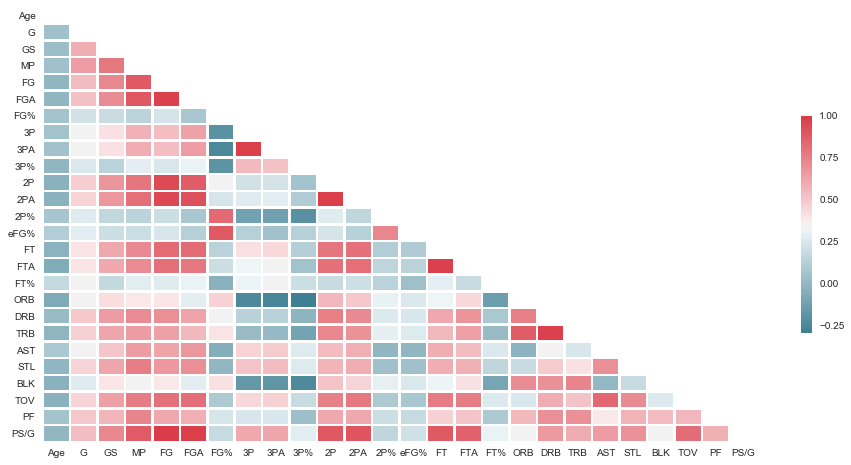

In [22]:
#To find the correlation between each other in the dataset
#This code is taken from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
cor=NBA.corr()
sb.set(style="white")
#generate a mask for the upper triangle
mask=np.zeros_like(cor,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
#set up the matplotlib figure
fig,ax=plt.subplots(figsize=(16,8))
#Generate a customr diverging colormap
cmap=sb.diverging_palette(220,10,as_cmap=True)
#draw the heatmap with mask and correct aspect raatio
ax=sb.heatmap(cor, mask=mask, cmap=cmap, square=False, linewidths=1.5, cbar_kws={"shrink":.5})
